<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%80%EB%84%90/%ED%8F%90%EA%B5%90%2B%EC%9D%B8%EA%B5%AC%EC%8B%9C%EA%B3%84%EC%97%B40830~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('인구전처리_2차_아동2정정.csv', encoding = 'cp949')
school = pd.read_csv('연도별시도폐교수.csv', encoding = 'cp949')

In [3]:
# 2024를 제일 아래로 보내기
temp = data.iloc[0].copy()
data = data.drop(data.index[0])
data = pd.concat([data,pd.DataFrame([temp])],ignore_index=True)
data = data.reset_index(drop=True)
data = data.astype(int)

data

,연도,전국,아동1,아동2
0,2008,7872603,2301333,5571270
1,2009,7660206,2240620,5419586
2,2010,7421479,2171808,5249671
3,2011,7143803,2096177,5047626
4,2012,6875773,2006083,4869690
5,2013,6662444,1943914,4718530
6,2014,6445006,1876535,4568471
7,2015,6221904,1808298,4413606
8,2016,6055963,1758396,4297567
9,2017,5911931,1714173,4197758


In [4]:
school

,폐교연도,시도구분,폐교갯수
0,2008,1,27
1,2008,2,2
2,2009,1,31
3,2009,2,7
4,2010,1,21
5,2010,2,3
6,2011,1,13
7,2011,2,3
8,2012,1,28
9,2012,2,4


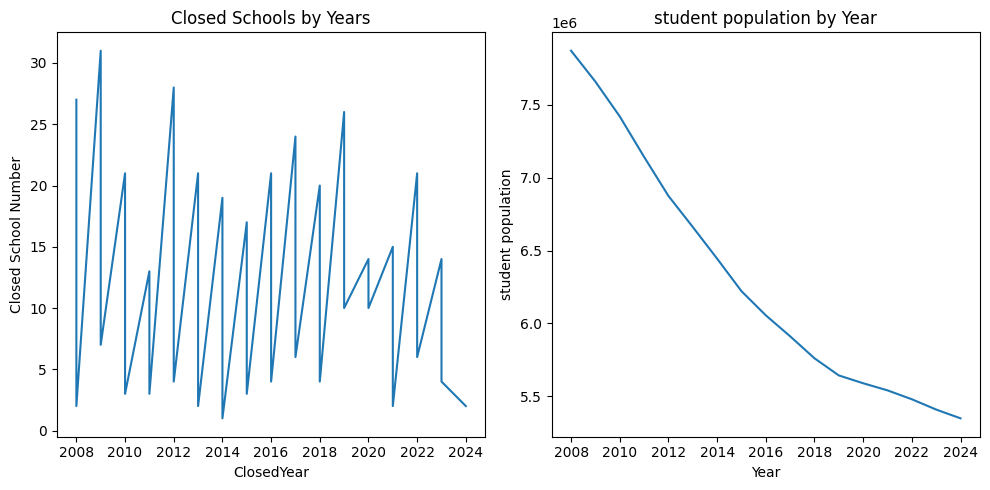

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(school['폐교연도'], school['폐교갯수'])
plt.xlabel('ClosedYear')
plt.ylabel('Closed School Number')
plt.title('Closed Schools by Years')

plt.subplot(1, 2, 2)
plt.plot(data['연도'], data['전국'])
plt.xlabel('Year')
plt.ylabel('student population')
plt.title('student population by Year')

plt.tight_layout()
plt.show()

In [6]:
data = data.rename(columns = {'연도': '폐교연도'})
data

,폐교연도,전국,아동1,아동2
0,2008,7872603,2301333,5571270
1,2009,7660206,2240620,5419586
2,2010,7421479,2171808,5249671
3,2011,7143803,2096177,5047626
4,2012,6875773,2006083,4869690
5,2013,6662444,1943914,4718530
6,2014,6445006,1876535,4568471
7,2015,6221904,1808298,4413606
8,2016,6055963,1758396,4297567
9,2017,5911931,1714173,4197758


In [7]:
# '연도'를 기준으로 두 데이터프레임 병합
merged_data = pd.merge(data, school, on='폐교연도')
merged_data

,폐교연도,전국,아동1,아동2,시도구분,폐교갯수
0,2008,7872603,2301333,5571270,1,27
1,2008,7872603,2301333,5571270,2,2
2,2009,7660206,2240620,5419586,1,31
3,2009,7660206,2240620,5419586,2,7
4,2010,7421479,2171808,5249671,1,21
5,2010,7421479,2171808,5249671,2,3
6,2011,7143803,2096177,5047626,1,13
7,2011,7143803,2096177,5047626,2,3
8,2012,6875773,2006083,4869690,1,28
9,2012,6875773,2006083,4869690,2,4


In [8]:
# 시도구분이 1인 데이터만 추출
num1_data = merged_data[merged_data['시도구분'] == 1]
num1_data

,폐교연도,전국,아동1,아동2,시도구분,폐교갯수
0,2008,7872603,2301333,5571270,1,27
2,2009,7660206,2240620,5419586,1,31
4,2010,7421479,2171808,5249671,1,21
6,2011,7143803,2096177,5047626,1,13
8,2012,6875773,2006083,4869690,1,28
10,2013,6662444,1943914,4718530,1,21
12,2014,6445006,1876535,4568471,1,19
14,2015,6221904,1808298,4413606,1,17
16,2016,6055963,1758396,4297567,1,21
18,2017,5911931,1714173,4197758,1,24


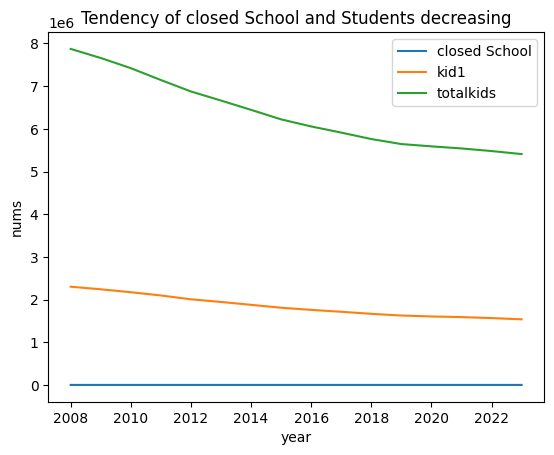

In [9]:
x = num1_data['폐교연도']

y1 = num1_data['폐교갯수']
y2 = num1_data['아동1']
y3 = num1_data['전국']

# 그래프 그리기
plt.plot(x, y1, label='closed School')
plt.plot(x, y2, label='kid1')
plt.plot(x, y3, label='totalkids')

# 축 레이블 및 범례 설정
plt.xlabel('year')
plt.ylabel('nums')
plt.title('Tendency of closed School and Students decreasing')
plt.legend()

# 그래프 표시
plt.show()

In [10]:
# 단위 변동 원할 시 활
num1_data['아동1_10만명당'] = num1_data['아동1']
num1_data['전국_10만명당'] = num1_data['전국']

<ipython-input-10-eb0945bfec8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num1_data['아동1_10만명당'] = num1_data['아동1']
<ipython-input-10-eb0945bfec8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num1_data['전국_10만명당'] = num1_data['전국']


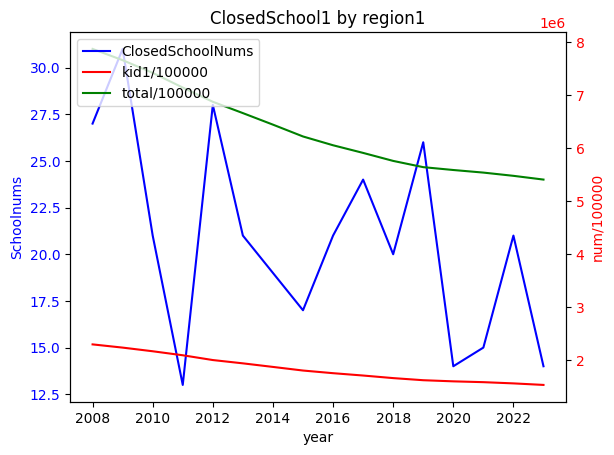

In [11]:
fig, ax1 = plt.subplots()

# 왼쪽 y축: 폐교갯수
ax1.plot(num1_data['폐교연도'], num1_data['폐교갯수'], color='blue', label='ClosedSchoolNums')
ax1.set_xlabel('year')
ax1.set_ylabel('Schoolnums', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 y축: 아동1_10만명당, 전국_10만명당
ax2 = ax1.twinx()
ax2.plot(num1_data['폐교연도'], num1_data['아동1_10만명당'], color='red', label='kid1/100000')
ax2.plot(num1_data['폐교연도'], num1_data['전국_10만명당'], color='green', label='total/100000')
ax2.set_ylabel('num/100000', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('ClosedSchool1 by region1')
plt.show()